In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('P4Data.txt', delimiter='\t')
centroids = pd.read_csv('P4Centroids.txt', delimiter='\t')

In [3]:
centroids= centroids.reset_index()

In [4]:
df.columns = ['x', 'y']
centroids.columns = ['x','y']

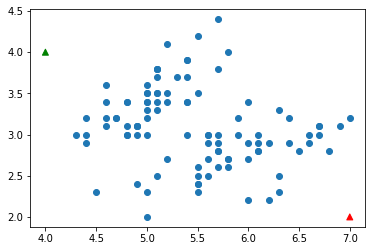

In [5]:
colormap = np.array(['red', 'green'])
fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'])
ax.scatter(centroids['x'], centroids['y'], c=colormap, marker = '^')

In [6]:
c1 = list(centroids.iloc[0])
c2 = list(centroids.iloc[1])

In [7]:
def calculate_centroid(c1, c2):    
    dist_cen_1 = np.sqrt((df['x'] - c1[0]) ** 2 + (df['y'] - c1[1]) ** 2)
    dist_cen_2 = np.sqrt((df['x'] - c2[0]) ** 2 + (df['y'] - c2[1]) ** 2)
    
    conditions = [
        dist_cen_1 < dist_cen_2, 
        dist_cen_1 > dist_cen_2]

    choices = ['cluster1', 'cluster2']

    df['cluster'] = np.select(conditions, choices, default=np.nan)
    df_c1 = df[df['cluster'] == 'cluster1']
    df_c2 = df[df['cluster'] == 'cluster2']
    
    cost = ((np.sqrt((df_c1['x'] - c1[0]) ** 2 + (df['y'] - c1[1]) ** 2)).sum() + (np.sqrt((df_c2['x'] - c2[0]) ** 2 + (df['y'] - c2[1]) ** 2)).sum())/len(df)
    print("Cost function value: ", cost)
    
    new_c1 = [0, 0]
    new_c2 = [0, 0]
    
    new_c1[0], new_c1[1] = round(sum(df_c1['x']) / len(df_c1), 4), round(sum(df_c1['y']) / len(df_c1), 4)
    new_c2[0], new_c2[1] = round(sum(df_c2['x']) / len(df_c2), 4), round(sum(df_c2['y']) / len(df_c2), 4)
    
    fig, ax = plt.subplots()
    ax.scatter(df_c1['x'], df_c1['y'], c = 'red')
    ax.scatter(df_c2['x'], df_c2['y'], c = 'green')  
    ax.scatter([new_c1[0], new_c2[0]], [new_c1[1], new_c2[1]], c=colormap, marker = '^', s = 150)
    
    return new_c1, new_c2

Cost function value:  1.3193958656585483
Cost function value:  0.4769219365027512
Returned Centroids:  [6.0267, 2.7911] [5.0164, 3.3418]


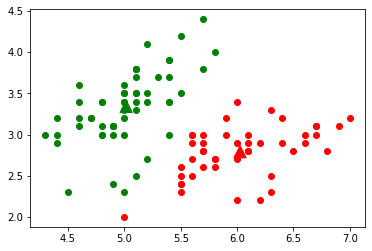

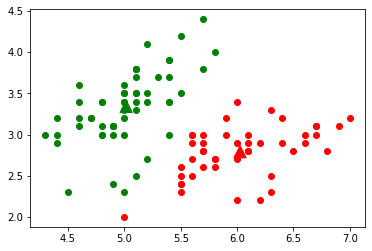

In [8]:
count = 0
new_c1, new_c2 = calculate_centroid(c1, c2)
while True:
    if new_c1 == c1 and new_c2 == c2:
        print('Returned Centroids: ', new_c1, new_c2)
        break
    else:
        c1, c2 = new_c1, new_c2
        new_c1, new_c2 = calculate_centroid(new_c1, new_c2)        

In [9]:
new_c1

[6.0267, 2.7911]

In [10]:
new_c2

[5.0164, 3.3418]